In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [2]:
!pip install wordcloud
from wordcloud import WordCloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 487.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 919.0 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/299.9 kB 944.1 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/299.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.2 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('remote_jobs.csv')
df.head()


,Title,Company,Tags,Date Posted
0,Senior Fullstack Software Engineer,Blotato,"Developer, JavaScript, Typescript, Heroku, AWS",2025-06-09T00:00:05+00:00


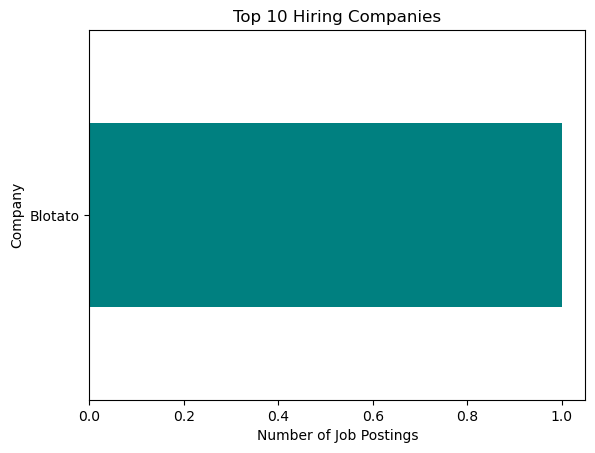

In [4]:
top_companies = df['Company'].value_counts().head(10)
top_companies.plot(kind='barh', color='teal')
plt.title('Top 10 Hiring Companies')
plt.xlabel('Number of Job Postings')
plt.gca().invert_yaxis()
plt.show()


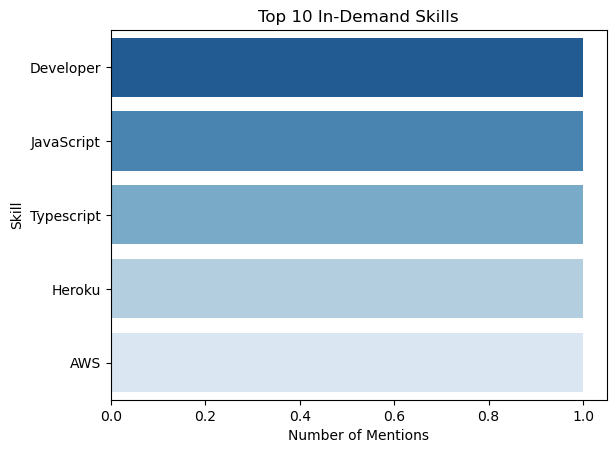

In [5]:
tags = ", ".join(df['Tags'].dropna()).split(", ")
tag_counts = Counter(tags)
top_tags = pd.DataFrame(tag_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False).head(10)

sns.barplot(data=top_tags, x='Count', y='Skill', palette='Blues_r')
plt.title('Top 10 In-Demand Skills')
plt.xlabel('Number of Mentions')
plt.ylabel('Skill')
plt.show()


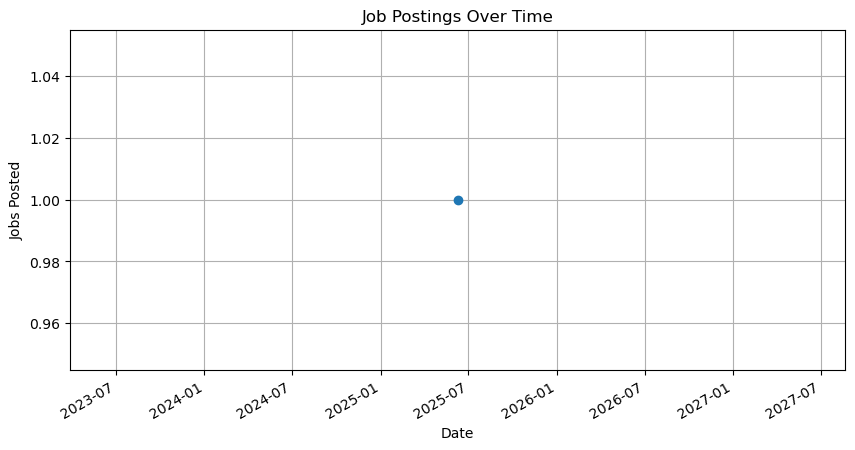

In [6]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'], errors='coerce')
job_by_date = df['Date Posted'].value_counts().sort_index()

plt.figure(figsize=(10,5))
job_by_date.plot(kind='line', marker='o')
plt.title('Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Jobs Posted')
plt.grid(True)
plt.show()


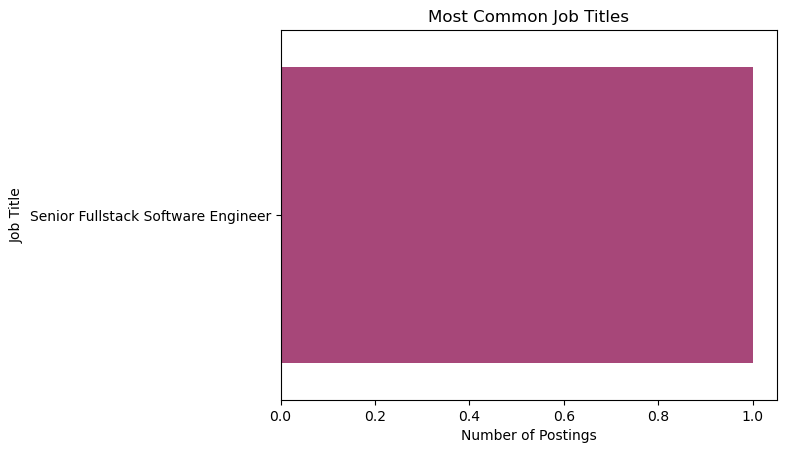

In [7]:
top_titles = df['Title'].value_counts().head(10)
sns.barplot(x=top_titles.values, y=top_titles.index, palette='magma')
plt.title('Most Common Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.show()
